In [1]:
!gdown https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights  ## yolov4 weights

Downloading...
From: https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights
To: /content/yolov4.weights
100% 258M/258M [00:01<00:00, 175MB/s]


In [2]:
!gdown https://raw.githubusercontent.com/Tianxiaomo/pytorch-YOLOv4/master/cfg/yolov4.cfg ##yolov4 cfg

Downloading...
From: https://raw.githubusercontent.com/Tianxiaomo/pytorch-YOLOv4/master/cfg/yolov4.cfg
To: /content/yolov4.cfg
12.2kB [00:00, 27.7MB/s]     


In [3]:
!gdown https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names ##coco names

Downloading...
From: https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
To: /content/coco.names
625B [00:00, 2.84MB/s]       


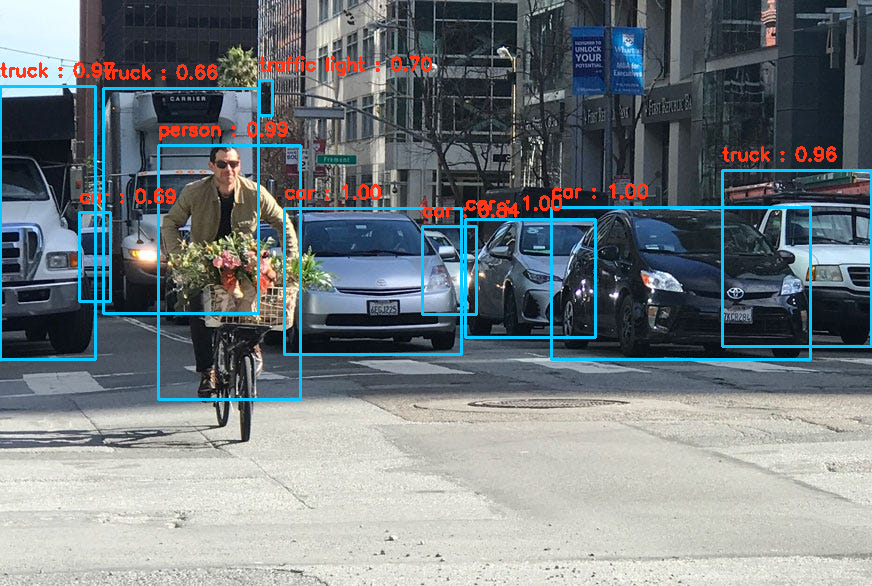

In [4]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

confidence = 0.6
Nms= 0.3
class_names = []
with open("coco.names", "r") as f:
  class_names = [cname.strip() for cname in f.readlines()]
img = cv2.imread("/content/1_EYFejGUjvjPcc4PZTwoufw.jpeg")
arc = cv2.dnn.readNet("yolov4.weights","yolov4.cfg")
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)
model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(640,640), scale=1/255, swapRB=True)
x =time.time()
classes, scores, boxes = model.detect(img, confidence, Nms)
for (classid, score, box) in zip(classes, scores, boxes):
        label = "%s : %.2f" % (class_names[classid],score)
        cv2.rectangle(img,box,color=(255, 200, 10),thickness=2)
        cv2.putText(img, label, (box[0],box[1]-10),cv2.FONT_HERSHEY_SIMPLEX,0.6,(25,55,255),2)
cv2_imshow(img)

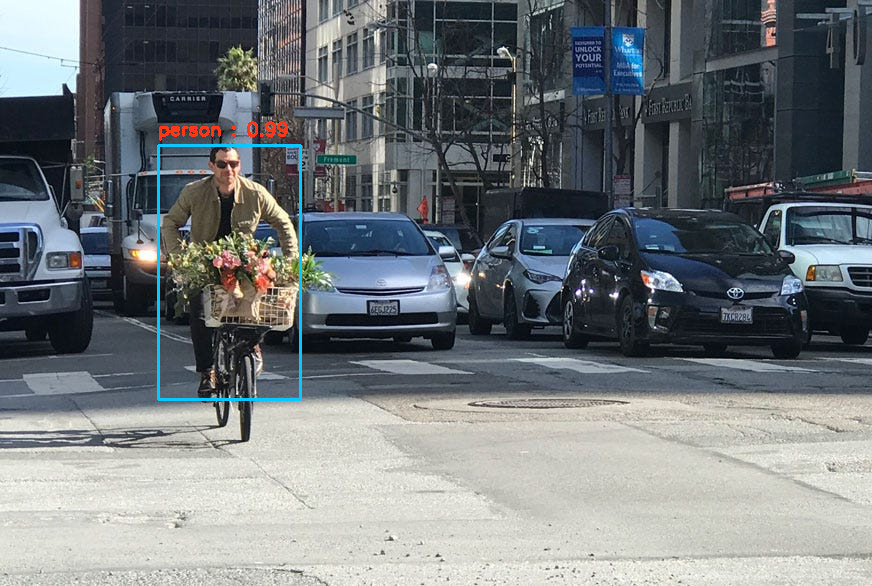

In [5]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

confidence = 0.6
Nms = 0.3
class_names = []
with open("coco.names", "r") as f:
    class_names = [cname.strip() for cname in f.readlines()]

img = cv2.imread("/content/1_EYFejGUjvjPcc4PZTwoufw.jpeg")
arc = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)
model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(640, 640), scale=1/255, swapRB=True)
x = time.time()

class_id_to_detect = class_names.index("person")
classes, scores, boxes = model.detect(img, confidence, Nms)
for (classid, score, box) in zip(classes, scores, boxes):
    if int(classid) == 0:
        label = "%s : %.2f" % (class_names[classid], score)
        cv2.rectangle(img, box, color=(255, 200, 10), thickness=2)
        cv2.putText(img, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (25, 55, 255), 2)

cv2_imshow(img)
